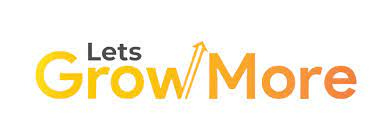


# Lets Grow More Intership(VIP) july-2023 

# Author - D Daniel Vincent Raj

# Title - Develop A Neural Network That Can Read Handwriting(task-1)

# ADVANCED LEVEL TASK

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
mnist=tf.keras.datasets.mnist
#x being the pixel data and y being the classification
(x_train, y_train),(x_test,y_test)=mnist.load_data()
# x data is the image itself the handwritten digit itself and y data is just the classification so the number the digit

In [3]:
# in next step we going to normalizing means every value is between 0 and 1
#so if we have a grayscalepixel can have lightness from 0 to 255 and if we normalize it we can go b/w 0 and 1

In [4]:
# so to do that 
x_train = tf.keras.utils.normalize(x_train,axis=1)
#we do not normalize the digits we only want to normalize the pixels
#because the makes easier for neural network to do calculations
x_test = tf.keras.utils.normalize(x_train,axis=1)
# that all about preprocessing now we can start model

In [5]:
#sequentialis a basic sequential neural network
model=tf.keras.models.Sequential()
#now we add layers to the model
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
#flattened layerr basically means that we faltten a certain imput shape 
#input_shape means? what is 28,28?
#flattend layer does is to turn them into one flat layer so it not a grid of 28 by 28 it turns 28*28=784 pixels


#  now we want denser layer-> is the most basic layer in nural network that is connected
# to each neuron is connected to each other neuron of other layer

#input layer
model.add(tf.keras.layers.Dense(128,activation='relu'))#Dense layer we specify the units 128 and then we use the activation function
# activation function ='relu'-> ReLU stands for Rectified Linear Unit
#info about relu= " https://www.baeldung.com/cs/ml-relu-dropout-layers#:~:text=As%20a%20consequence%2C%20the%20usage,adding%20extra%20ReLUs%20increases%20linearly. "


model.add(tf.keras.layers.Dense(128,activation='relu'))#middle layer


model.add(tf.keras.layers.Dense(10,activation='softmax'))#this is going to be output layer
#we use 10 units to represent individual digits 
#so we have 0,1,2,3,4,5,6,7,8,9 that is 10 neurons and activation function is going to be 'softmax'
#so softmax does is it makes sure all the outputs all the 10 neurons add up to 1
#so each of the 10 digit neurons is going to have value b/w 0 and 1
#so softmax gives us the probability for each digit to be right answer

In [6]:
# now we compile the model
model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# we choose 'optimizer'=adam ->adaptive moment estimation
#Adam optimizer is a powerful tool for improving the accuracy and speed of
#deep learning models. Its adaptive learning rate and momentum-based approach
#can help the neural network learn faster and converge more quickly towards the optimal set of parameters that minimize the cost or loss function.


# we choose 'loss'=sparse_categorical_crossentropy
#The purpose of loss functions is to compute the quantity that a model should seek to minimize during training.
# for more info on loss->  https://keras.io/api/losses/



#metrics=accuracy-> Metrics are used to monitor and measure the performance of
#                  a model (during training and testing), and don't need to be
#                  differentiable.
#info on metrics ->https://neptune.ai/blog/performance-metrics-in-machine-learning-complete-guide#:~:text=Metrics%20are%20used%20to%20monitor,it)%2C%20such%20as%20MSE.
#info on accuracy-> https://developers.google.com/machine-learning/crash-course/classification/accuracy#:~:text=Accuracy%20is%20one%20metric%20for,predictions%20Total%20number%20of%20predictions

In [15]:
# now we need to fit the model means to train the model.
model.fit(x_train,y_train,epochs=7)
#epochs is how many iterations we see


Epoch 1/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0122 - accuracy: 0.0988
Epoch 2/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0113 - accuracy: 0.0988
Epoch 3/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0100 - accuracy: 0.0988
Epoch 4/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0086 - accuracy: 0.0987 - ETA: 0s - loss: 0.0088 - 
Epoch 5/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0103 - accuracy: 0.0987
Epoch 6/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0092 - accuracy: 0.0987
Epoch 7/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0080 - accuracy: 0.0986


In [16]:
#now model training is done we are going to save it
model.save('handwritting.model')

INFO:tensorflow:Assets written to: handwritting.model\assets



# we can use Convolutionsl neural network to make hand writting analysis


In [17]:
# i got error in (*** cell) so we use this
print(x_test.shape)
print(y_test.shape)
x_test = x_test[:10000]  # Assuming you want the first 10,000 samples from x_test
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)
(10000, 28, 28)
(10000,)


In [18]:
#*** 

model = tf.keras.models.load_model('handwritting.model')#we always we need to run from top but by this code we saved and running the model without running all the steps
loss, accuracy = model.evaluate(x_test, y_test)
print(loss) # the loss function is absolute value which we want to get as low as possible

print(accuracy) #accuracy is the number b/w zero and one
                #one means 100% accuracy

313/313 [==============================] - 1s 2ms/step - loss: 30.9434 - accuracy: 0.1001
30.9433650970459
0.10010000318288803


In [19]:
#now we goind to to have the hand written paint
#that we are going to draw ourself and give it to model and predict the model what we have drawn

#now create a digit directory in the folder and use the paint in system

the digit probably a 1


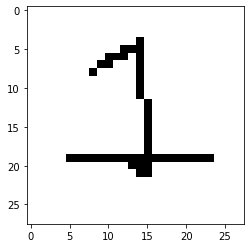

the digit probably a 2


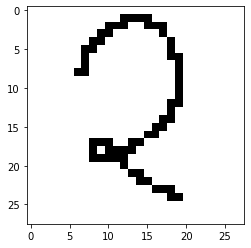

the digit probably a 3


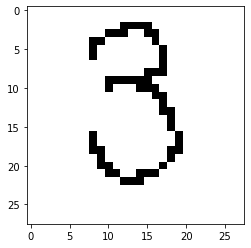

the digit probably a 9


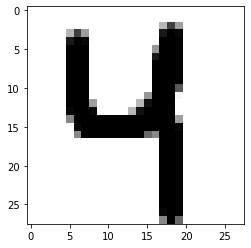

In [20]:
#now we r going to predict the image
image_number=1
while os.path.isfile(f"digits/digit{image_number}.png"):
    try:
        img=cv2.imread(f"digits/digit{image_number}.png")[:,:,0]
        img=np.invert(np.array([img]))
        prediction=model.predict(img)
        print(F"the digit probably a {np.argmax(prediction)}")#argmax gives us the index of the field
                                                #  that has the highest number so it shows which 
                                                # neuron have the highest activation 
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
    except:
        print("error")
    finally:
        image_number += 1

In [13]:
#the accuracy of digit 4 is wrong to improve the accuracy we need to increase the epochs value  

The expression

**os.path.isfile(f"digits/digit{image_number}.png")**

is checking whether a file exists at the specified path. Let's break it down:

1)os.path is a module in Python's standard library that provides functions for working with file paths.

2)isfile() is a function from the os.path module that checks if a path refers to a regular file (as opposed to a directory, symbolic link, etc.).

3)f"digits/digit{image_number}.png" is a formatted string that dynamically generates the file path by substituting the value of the image_number variable into the string.

In summary, this expression is used to check if a file exists at the path specified by the string digits/digit{image_number}.png. It returns True if a file exists at that location, and False otherwise.

**img=cv2.imread(f"digit/digits{image_number}.png")[:,:,0]**
performs the following actions:

1)cv2.imread() is a function from the OpenCV library that reads an image file from the specified path and returns a NumPy array representing the image.

2)f"digit/digits{image_number}.png" is a formatted string that dynamically generates the file path by substituting the value of the image_number variable into the string. This assumes that there is an image file named digits{image_number}.png located in the digit/ directory.

3)The resulting image is stored in the img variable.

4)[:,:,0] is an indexing operation that selects the first channel of the image array. In OpenCV, color images are represented as three-channel (BGR) arrays, where each channel represents the intensity of blue, green, and red, respectively. By selecting [:,:,0], we are extracting only the blue channel of the image.

To summarize, this code reads an image file, specified by the dynamic path generated with f"digit/digits{image_number}.png", using OpenCV's imread() function. It then extracts the blue channel of the image and stores it in the img variable as a two-dimensional NumPy array.

# info